In [281]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import queue
import random

In [282]:
def Generar_Tablero(fila, columna):
    if (fila%2)==0:
      fila -= 1
    if (columna%2)==0:
      columna-=1
    tablero = np.zeros((fila,columna), dtype = int) 
    ## Ganar
    tablero[0,0::1] = 1
    tablero[fila - 1,0::1] = 2
    ## Jugadores
    pos1 = random.randint(0,columna - 1)
    pos2 = random.randint(0,columna - 1)
    tablero[0, pos1] = 3
    tablero[fila - 1, pos2] = 4
    #OBSTACULOS
    i = 1
    j = fila - 1
    for i in range(1, j):
      tablero[i, random.randint(0,columna - 1)] = 5
    return tablero

In [283]:
def dibujarTablero(matriz, id=True):
  plt.figure(figsize=(np.size(matriz,0),np.size(matriz,1)))
  sns.heatmap(matriz, linewidths=.1, linecolor='white', annot=False, cmap='magma', yticklabels=False, xticklabels=False, cbar=False, square=True);
  sns.heatmap(matriz, linewidths=.1, linecolor='white', annot=id, cmap='magma', yticklabels=False, xticklabels=False, cbar=False, square=True,
  mask=np.array(matriz)<0);
  plt.show()

In [284]:
fila = 5
columna = 5
Generar_Tablero(fila, columna)

array([[1, 1, 3, 1, 1],
       [0, 0, 5, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 0, 5],
       [2, 2, 2, 2, 4]])

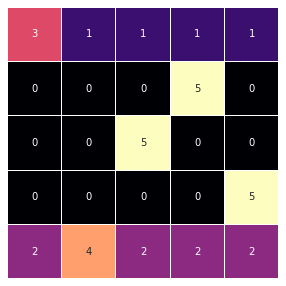

In [285]:
matriz = Generar_Tablero(fila, columna)
auxiliar = matriz.copy()
dibujarTablero(matriz)

In [286]:
def Pinta_Camino(matriz, path = ""):
    for x, pos in enumerate(matriz[0]):
        if pos == 3:
            start = x

    i = start
    j = 0
    pos = set()
    for move in path:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1
        pos.add((j, i))
    
    for j, row in enumerate(matriz):
        for i, col in enumerate(row):
            if (j, i) in pos:
              matriz[j, i] = 7
        print()

In [287]:
def valid(matriz, moves):
    for x, pos in enumerate(matriz[0]):
        if pos == 3:
            start = x

    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

        if not(0 <= i < len(matriz[0]) and 0 <= j < len(matriz)):
            return False
        elif (matriz[j][i] == 5):
            return False

    return True

In [288]:
def findEnd(matriz, moves):
    for x, pos in enumerate(matriz[0]):
        if pos == 3:
          start = x
    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

    if matriz[j][i] == 2:
        print("Found: " + moves)
        Pinta_Camino(matriz, moves)
        return True

    return False

In [289]:
nums = queue.Queue()
nums.put("")
add = ""

while not findEnd(matriz, add): 
    add = nums.get()
    for j in ["L", "R", "U", "D"]:
        put = add + j
        if valid(matriz, put):
            nums.put(put)

Found: DDDD







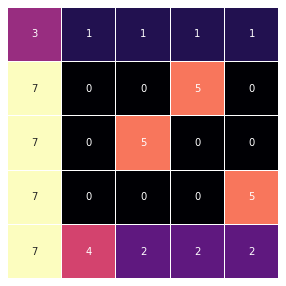

In [290]:
dibujarTablero(matriz)

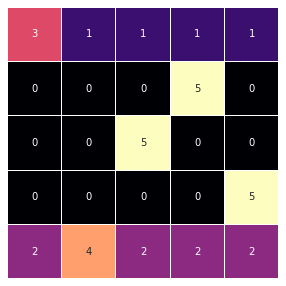

In [291]:
dibujarTablero(auxiliar)

In [292]:
def Pinta_Camino_jugador_segundo(matriz, path = ""):
    for x, pos in enumerate(matriz[fila-1]):
        if pos == 4:
            start = x

    i = start
    j = fila - 1
    pos = set()
    for move in path:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1
        pos.add((j, i))
    
    for j, row in enumerate(matriz):
        for i, col in enumerate(row):
            if (j, i) in pos:
              matriz[j, i] = 8
        print()

In [293]:
def valid_jugador_segundo(matriz, moves):
    for x, pos in enumerate(matriz[fila-1]):
        if pos == 4:
            start = x

    i = start
    j = fila - 1
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

        if not(0 <= i < len(matriz[0]) and 0 <= j < len(matriz)):
            return False
        elif (matriz[j][i] == 5):
            return False

    return True

In [294]:
def findEnd_segundo_jugador(matriz, moves):
    for x, pos in enumerate(matriz[fila-1]):
        if pos == 4:
          start = x
    i = start
    j = fila - 1
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

    if matriz[j][i] == 1:
        print("Found: " + moves)
        Pinta_Camino_jugador_segundo(matriz, moves)
        return True

    return False

In [295]:
nums = queue.Queue()
nums.put("")
agregar = ""

while not findEnd_segundo_jugador(auxiliar, agregar): 
    agregar = nums.get()
    for j in ["L", "R", "U", "D"]:
        put = agregar + j
        if valid_jugador_segundo(auxiliar, put):
            nums.put(put)

Found: UUUU







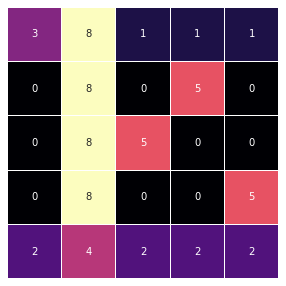

In [296]:
dibujarTablero(auxiliar)